In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('Admission_Predict.csv')


In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.drop(['Serial No.'],axis=1,inplace=True)

In [5]:
X = df.iloc[:, 0:7].values
y = df.iloc[:, 7].values

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


In [7]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
X_train = scalerX.fit_transform(X_train)
X_test = scalerX.transform(X_test)


In [8]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)



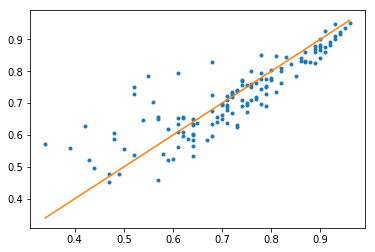

In [10]:
# Visualising the results
plt.plot(y_test,y_pred,'.')
x = np.linspace(min(y_test),max(y_test))
z = x
plt.plot(x, z)


In [11]:
#adding x0=1(lin reg eq->y=b0+b1x1+b2x2...,we have x1..xn,but x0=1 needs to be added)
import statsmodels.formula.api as sm
X= np.append(arr=np.ones((400,1)).astype(int),values=X,axis=1)

In [12]:
X_opt=X[:,[0,1,2,3,4,5,6,7]]#
#significance level=0.05
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()

In [13]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     228.9
Date:                Thu, 22 Aug 2019   Prob (F-statistic):          3.12e-134
Time:                        10:53:15   Log-Likelihood:                 537.37
No. Observations:                 400   AIC:                            -1059.
Df Residuals:                     392   BIC:                            -1027.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2594      0.125    -10.097      0.000      -1.505      -1.014
x1             0.0017      0.001      2.906      0.004       0.001       0.003
x2             0.0029      0.001      2.680      0.008       0.001       0.005
x3             0.0057      0.005      1.198      0.232      -0.004       0.015
x4            -0.0033      0.006     -0.594      0.553      -0.014       0.008
x5             0.0224      0.006      4.034      0.000       0.011       0.033
x6             0.1189      0.012      9.734      0.000       0.095       0.143
x7             0.0245      0.008      3.081      0.002       0.009       0.040
==============================================================================
Omnibus:                       87.895   Durbin-Watson:                   0.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.191
Skew:                          -1.159   Prob(JB):                     4.52e-40
Kurtosis:                       5.344   Cond. No.                     1.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#SOP removed
X_opt=X[:,[0,1,2,3,5,6,7]]#
#significance level=0.05
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()

In [15]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     267.5
Date:                Thu, 22 Aug 2019   Prob (F-statistic):          2.18e-135
Time:                        10:53:20   Log-Likelihood:                 537.19
No. Observations:                 400   AIC:                            -1060.
Df Residuals:                     393   BIC:                            -1032.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2543      0.124    -10.089      0.000      -1.499      -1.010
x1             0.0018      0.001      2.962      0.003       0.001       0.003
x2             0.0028      0.001      2.628      0.009       0.001       0.005
x3             0.0049      0.005      1.069      0.286      -0.004       0.014
x4             0.0210      0.005      4.147      0.000       0.011       0.031
x5             0.1179      0.012      9.756      0.000       0.094       0.142
x6             0.0242      0.008      3.046      0.002       0.009       0.040
==============================================================================
Omnibus:                       89.012   Durbin-Watson:                   0.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.552
Skew:                          -1.171   Prob(JB):                     8.41e-41
Kurtosis:                       5.364   Cond. No.                     1.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#university rating removed
X_opt=X[:,[0,1,2,5,6,7]]#
#significance level=0.05
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()

In [17]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     320.6
Date:                Thu, 22 Aug 2019   Prob (F-statistic):          2.04e-136
Time:                        10:53:24   Log-Likelihood:                 536.61
No. Observations:                 400   AIC:                            -1061.
Df Residuals:                     394   BIC:                            -1037.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2985      0.117    -11.070      0.000      -1.529      -1.068
x1             0.0018      0.001      2.992      0.003       0.001       0.003
x2             0.0030      0.001      2.847      0.005       0.001       0.005
x3             0.0228      0.005      4.741      0.000       0.013       0.032
x4             0.1210      0.012     10.312      0.000       0.098       0.144
x5             0.0246      0.008      3.103      0.002       0.009       0.040
==============================================================================
Omnibus:                       87.489   Durbin-Watson:                   0.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.337
Skew:                          -1.157   Prob(JB):                     1.14e-39
Kurtosis:                       5.325   Cond. No.                     1.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#The least significant determinants are --SOP and University Ratings
#The most significant determinants are-- LOR and CGPA